In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
x=10


In [7]:
x


10

In [8]:
12==x


False

In [10]:
df = pd.read_csv("Walmart_Sales.csv")
df.head()  # Show first 5 rows


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
print(df.isnull().sum())  # Count missing values in each column


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [15]:
#df.fillna(method="ffill", inplace=True)  # Fill forward missing values


In [13]:
df.drop_duplicates(inplace=True)


In [16]:
print(df.describe())  # Summary statistics
print(df.info())  # Data types & null values



             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [17]:
df.keys()

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

### Total weekly sales over time

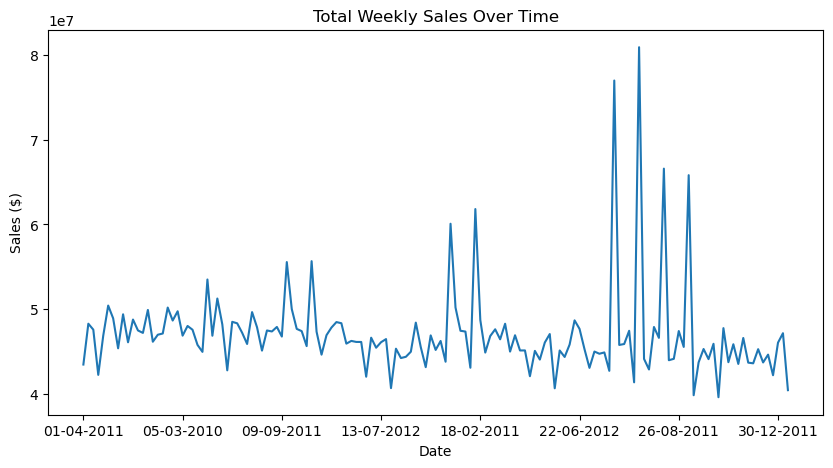

In [18]:
df.groupby("Date")["Weekly_Sales"].sum().plot(figsize=(10, 5), title="Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.show()

### Store wise sales

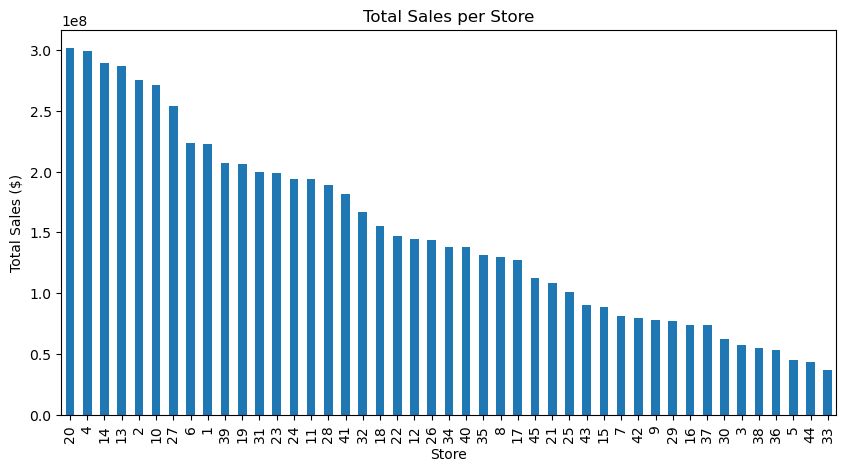

In [20]:
top_stores = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)
top_stores.plot(kind="bar", title="Total Sales per Store", figsize=(10, 5))
plt.xlabel("Store")
plt.ylabel("Total Sales ($)")
plt.show()

### Effect of Holidays on Sales

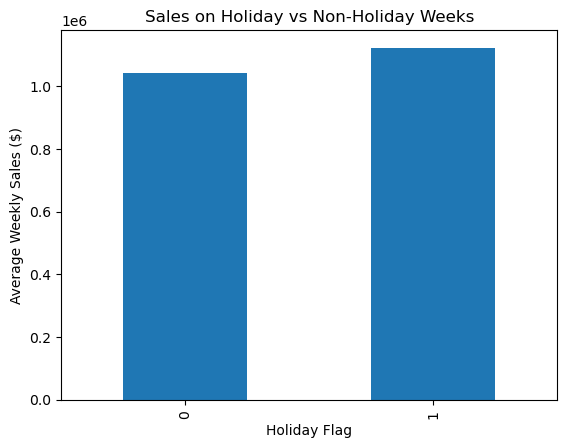

In [21]:
df.groupby("Holiday_Flag")["Weekly_Sales"].mean().plot(kind="bar", title="Sales on Holiday vs Non-Holiday Weeks")
plt.xlabel("Holiday Flag")
plt.ylabel("Average Weekly Sales ($)")
plt.show()

Statistical analylsis with numpy

## Mean median of weekly sales


In [22]:
mean_sales = np.mean(df["Weekly_Sales"])
median_sales = np.median(df["Weekly_Sales"])
print(f"Mean Weekly Sales: {mean_sales}")
print(f"Median Weekly Sales: {median_sales}")

Mean Weekly Sales: 1046964.8775617715
Median Weekly Sales: 960746.04


## Sales Standard Deviation

In [23]:
std_dev = np.std(df["Weekly_Sales"])
print(f"Sales Standard Deviation: {std_dev}")

Sales Standard Deviation: 564322.7690195541


## Detecting outliers

In [24]:
z_scores = (df["Weekly_Sales"] - mean_sales) / std_dev
df["Z_Score"] = z_scores
outliers = df[df["Z_Score"] > 3]
print(outliers)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189       2  24-12-2010    3436007.68             0        49.97       2.886   
241       2  23-12-2011    3224369.80             0        46.66       3.112   
471       4  26-11-2010    2789469.45             1        48.08       2.752   
474       4  17-12-2010    2740057.14             0        46.57       2.884   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
523       4  25-11-2011    3004702.33             1        47.96       3.225   
526       4  16-12-2011    2771397.17             0        36.44       3.149   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
1329     10  26-11-2010    2939946.38             1        55.33       3.162   
1332     10  17-12-2010    2811646.85             0        59.15       3.125   
1333     10  24-12-2010    3749057.69             0        57.06       3.236   
1381     10  25-11-2011    2950198.64   

I then analysed using seaborn the external factors affecting sales like temperature,fuel price and unemployment

### Effect of Temperature on Sales

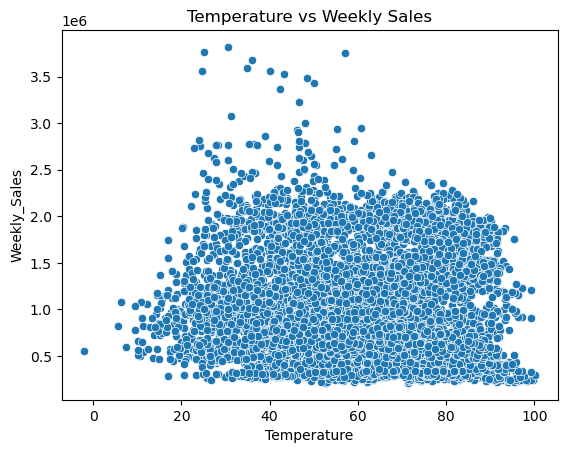

In [25]:
sns.scatterplot(x=df["Temperature"], y=df["Weekly_Sales"])
plt.title("Temperature vs Weekly Sales")
plt.show()

### Effect of Fuel Prices on Sales

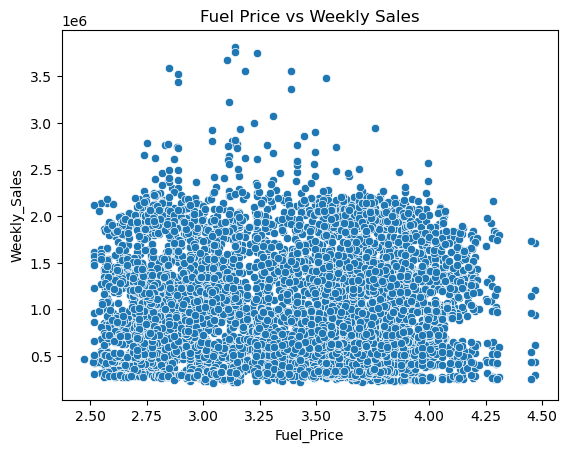

In [26]:
sns.scatterplot(x=df["Fuel_Price"], y=df["Weekly_Sales"])
plt.title("Fuel Price vs Weekly Sales")
plt.show()

### Effect of Unemployment on Sales

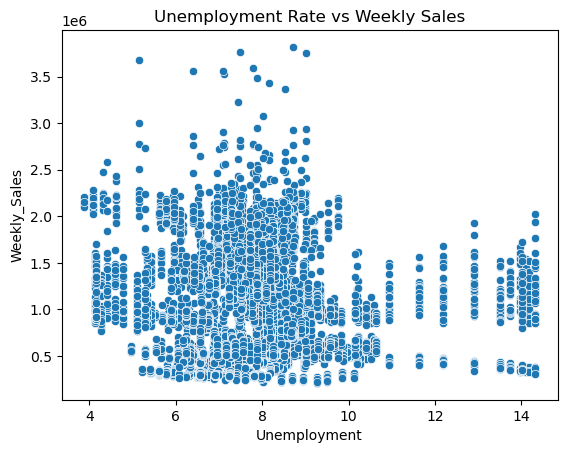

In [27]:
sns.scatterplot(x=df["Unemployment"], y=df["Weekly_Sales"])
plt.title("Unemployment Rate vs Weekly Sales")
plt.show()

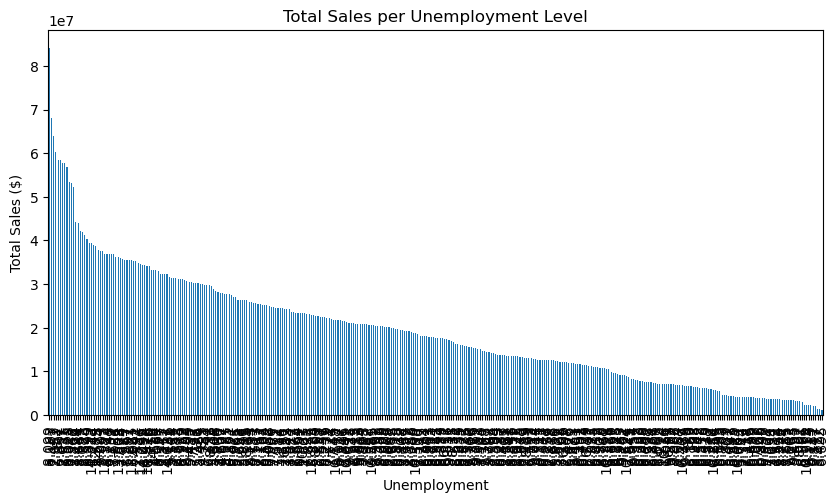

In [32]:
top_stores = df.groupby("Unemployment")["Weekly_Sales"].sum().sort_values(ascending=False)
top_stores.plot(kind="bar", title="Total Sales per Unemployment Level", figsize=(10, 5))
plt.xlabel("Unemployment")
plt.ylabel("Total Sales ($)")
plt.show()

In [34]:
df.to_csv("cleaned_sales_data.csv", index=False)

#### End of Project Part(data analysis)